In [36]:
import pandas as pd
import numpy as np

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from IPython.display import Image

#Library for building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [37]:
# Reading the data and creating the dataframe
df = pd.read_csv("telco.csv", sep=',', header=0)

In [38]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [39]:
# Getting info of the whole original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [40]:
# The number of unique variables
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Country                                 1
State                                   1
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Population                           1569
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                  

In [41]:
# Dropping the variables we don't need
df=df.drop(["Country", "State", "Quarter", "Customer ID", "Offer", "Internet Type", "Customer Status", "Churn Score", "CLTV",
           "Latitude", "Longitude", "Under 30", "Total Long Distance Charges", "Total Revenue", "Total Charges",
           "Total Refunds", "Churn Category", "Churn Reason", "City", "Zip Code"], axis=1)

In [42]:
# New info after dropping the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Phone Service                      7043 non-null   object 
 11  Avg Monthly Long Distance Charges  7043 non-null   float

In [43]:
# Changing yes/no to 1/0
df["Gender"] = df["Gender"].replace({"Male" : 1, "Female" : 0})
df["Senior Citizen"] = df["Senior Citizen"].replace({"Yes" : 1, "No" : 0})
df["Married"] = df["Married"].replace({"Yes" : 1, "No" : 0})
df["Dependents"] = df["Dependents"].replace({"Yes" : 1, "No" : 0})
df["Referred a Friend"] = df["Referred a Friend"].replace({"Yes" : 1, "No" : 0})
df["Phone Service"] = df["Phone Service"].replace({"Yes" : 1, "No" : 0})
df["Multiple Lines"] = df["Multiple Lines"].replace({"Yes" : 1, "No" : 0})
df["Internet Service"] = df["Internet Service"].replace({"Yes" : 1, "No" : 0})
df["Online Security"] = df["Online Security"].replace({"Yes" : 1, "No" : 0})
df["Online Backup"] = df["Online Backup"].replace({"Yes" : 1, "No" : 0})
df["Device Protection Plan"] = df["Device Protection Plan"].replace({"Yes" : 1, "No" : 0})
df["Premium Tech Support"] = df["Premium Tech Support"].replace({"Yes" : 1, "No" : 0})
df["Streaming TV"] = df["Streaming TV"].replace({"Yes" : 1, "No" : 0})
df["Streaming Movies"] = df["Streaming Movies"].replace({"Yes" : 1, "No" : 0})
df["Streaming Music"] = df["Streaming Music"].replace({"Yes" : 1, "No" : 0})
df["Unlimited Data"] = df["Unlimited Data"].replace({"Yes" : 1, "No" : 0})
df["Paperless Billing"] = df["Paperless Billing"].replace({"Yes" : 1, "No" : 0})
df["Churn Label"] = df["Churn Label"].replace({"Yes" : 1, "No" : 0})

# Dividing satisfaction score by 5, so it's between 0 and 1
df["Satisfaction Score"] = df["Satisfaction Score"]/5


df["Contract"] = df["Contract"].replace({"Month-to-Month" : 0, "One Year" : 1, "Two Year" : 2})
df["Payment Method"] = df["Payment Method"].replace({"Bank Withdrawal" : 0, "Credit Card" : 1, "Mailed Check" : 2})

C:\Users\danie\AppData\Local\Temp\ipykernel_7188\4175471533.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male" : 1, "Female" : 0})
C:\Users\danie\AppData\Local\Temp\ipykernel_7188\4175471533.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Senior Citizen"] = df["Senior Citizen"].replace({"Yes" : 1, "No" : 0})
C:\Users\danie\AppData\Local\Temp\ipykernel_7188\4175471533.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   int64  
 3   Married                            7043 non-null   int64  
 4   Dependents                         7043 non-null   int64  
 5   Number of Dependents               7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   int64  
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Phone Service                      7043 non-null   int64  
 11  Avg Monthly Long Distance Charges  7043 non-null   float

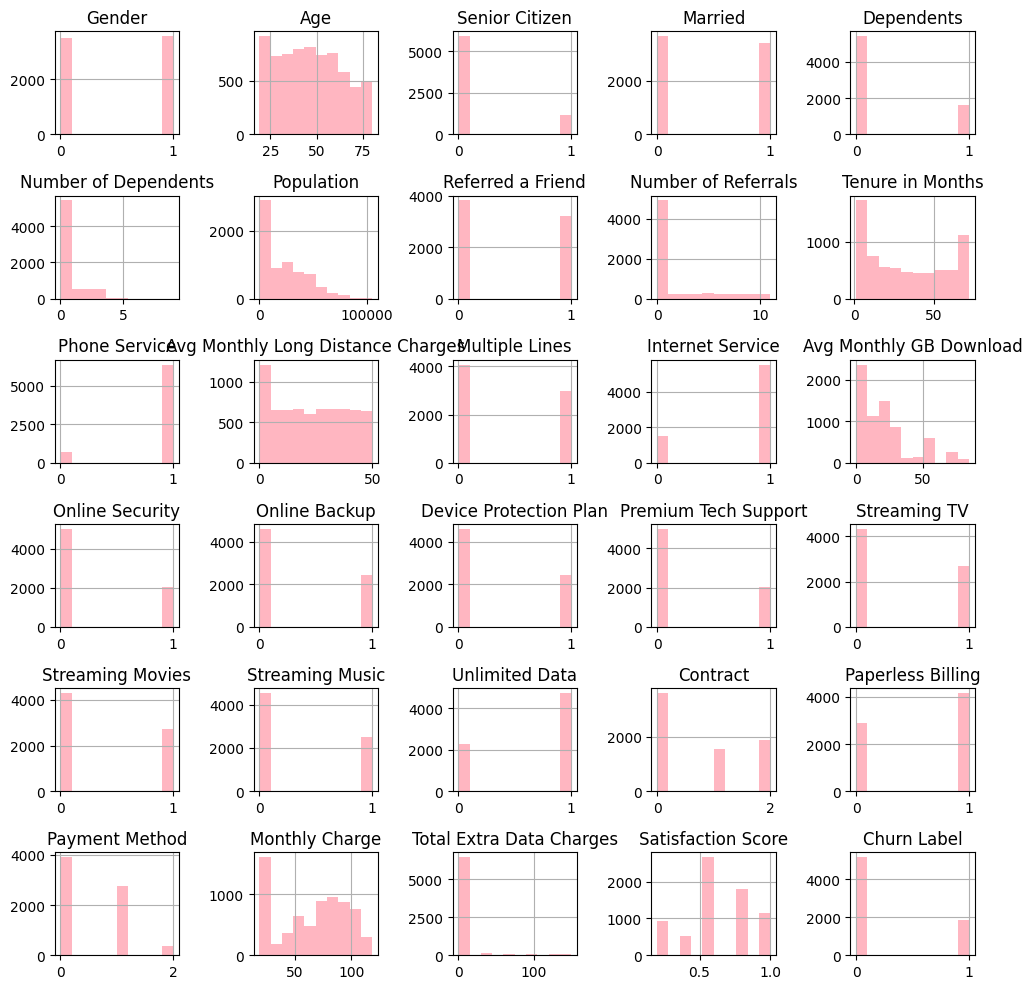

In [45]:
# Creating hstograms of the numerical variables (all)
df.hist(figsize=(10,10), color="lightpink")
plt.tight_layout()

In [46]:
# Seeing other stats of the variables
df.describe()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Population,Referred a Friend,Number of Referrals,Tenure in Months,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Extra Data Charges,Satisfaction Score,Churn Label
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,46.509726,0.162147,0.483033,0.231010,0.468692,22139.603294,0.457476,1.951867,32.386767,...,0.387903,0.353259,0.673719,0.754792,0.592219,0.499645,64.761692,6.860713,0.648985,0.265370
std,0.500013,16.750352,0.368612,0.499748,0.421508,0.962802,21152.392837,0.498224,3.001199,24.542061,...,0.487307,0.478016,0.468885,0.848468,0.491457,0.599483,30.090047,25.104978,0.240331,0.441561
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.200000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,2344.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000,0.600000,0.000000
50%,1.000000,46.000000,0.000000,0.000000,0.000000,0.000000,17554.000000,0.000000,0.000000,29.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,70.350000,0.000000,0.600000,0.000000
75%,1.000000,60.000000,0.000000,1.000000,0.000000,0.000000,36125.000000,1.000000,3.000000,55.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,89.850000,0.000000,0.800000,1.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000,9.000000,105285.000000,1.000000,11.000000,72.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,118.750000,150.000000,1.000000,1.000000


In [47]:
# Counting the values of the Churn Label variable
churncounts = df["Churn Label"].value_counts()
churncounts

Churn Label
0    5174
1    1869
Name: count, dtype: int64

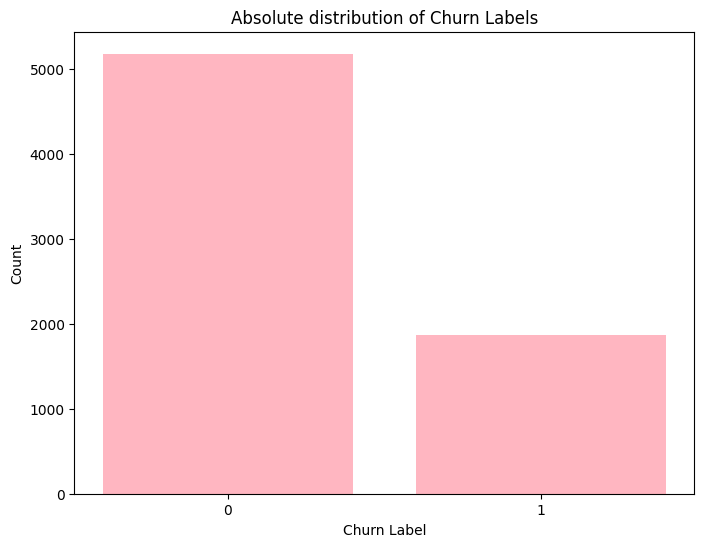

In [48]:
plt.figure(figsize=(8,6))
plt.bar(churncounts.index, churncounts.values, color="lightpink")
plt.title("Absolute distribution of Churn Labels")
plt.xlabel("Churn Label")
plt.ylabel("Count")
plt.xticks(churncounts.index)
plt.show()

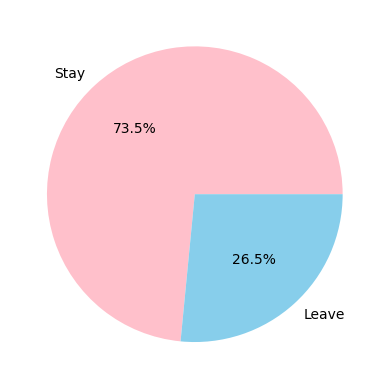

In [49]:
# Pie chart
plt.pie(churncounts, labels=["Stay", "Leave"], autopct="%1.1f%%", colors=["pink", "skyblue"]);

In [50]:
# Using one-hot encoding, making dummy variables of the two categorical variables we have
df = pd.get_dummies(df, columns=[
    "Contract",
    "Payment Method"
])

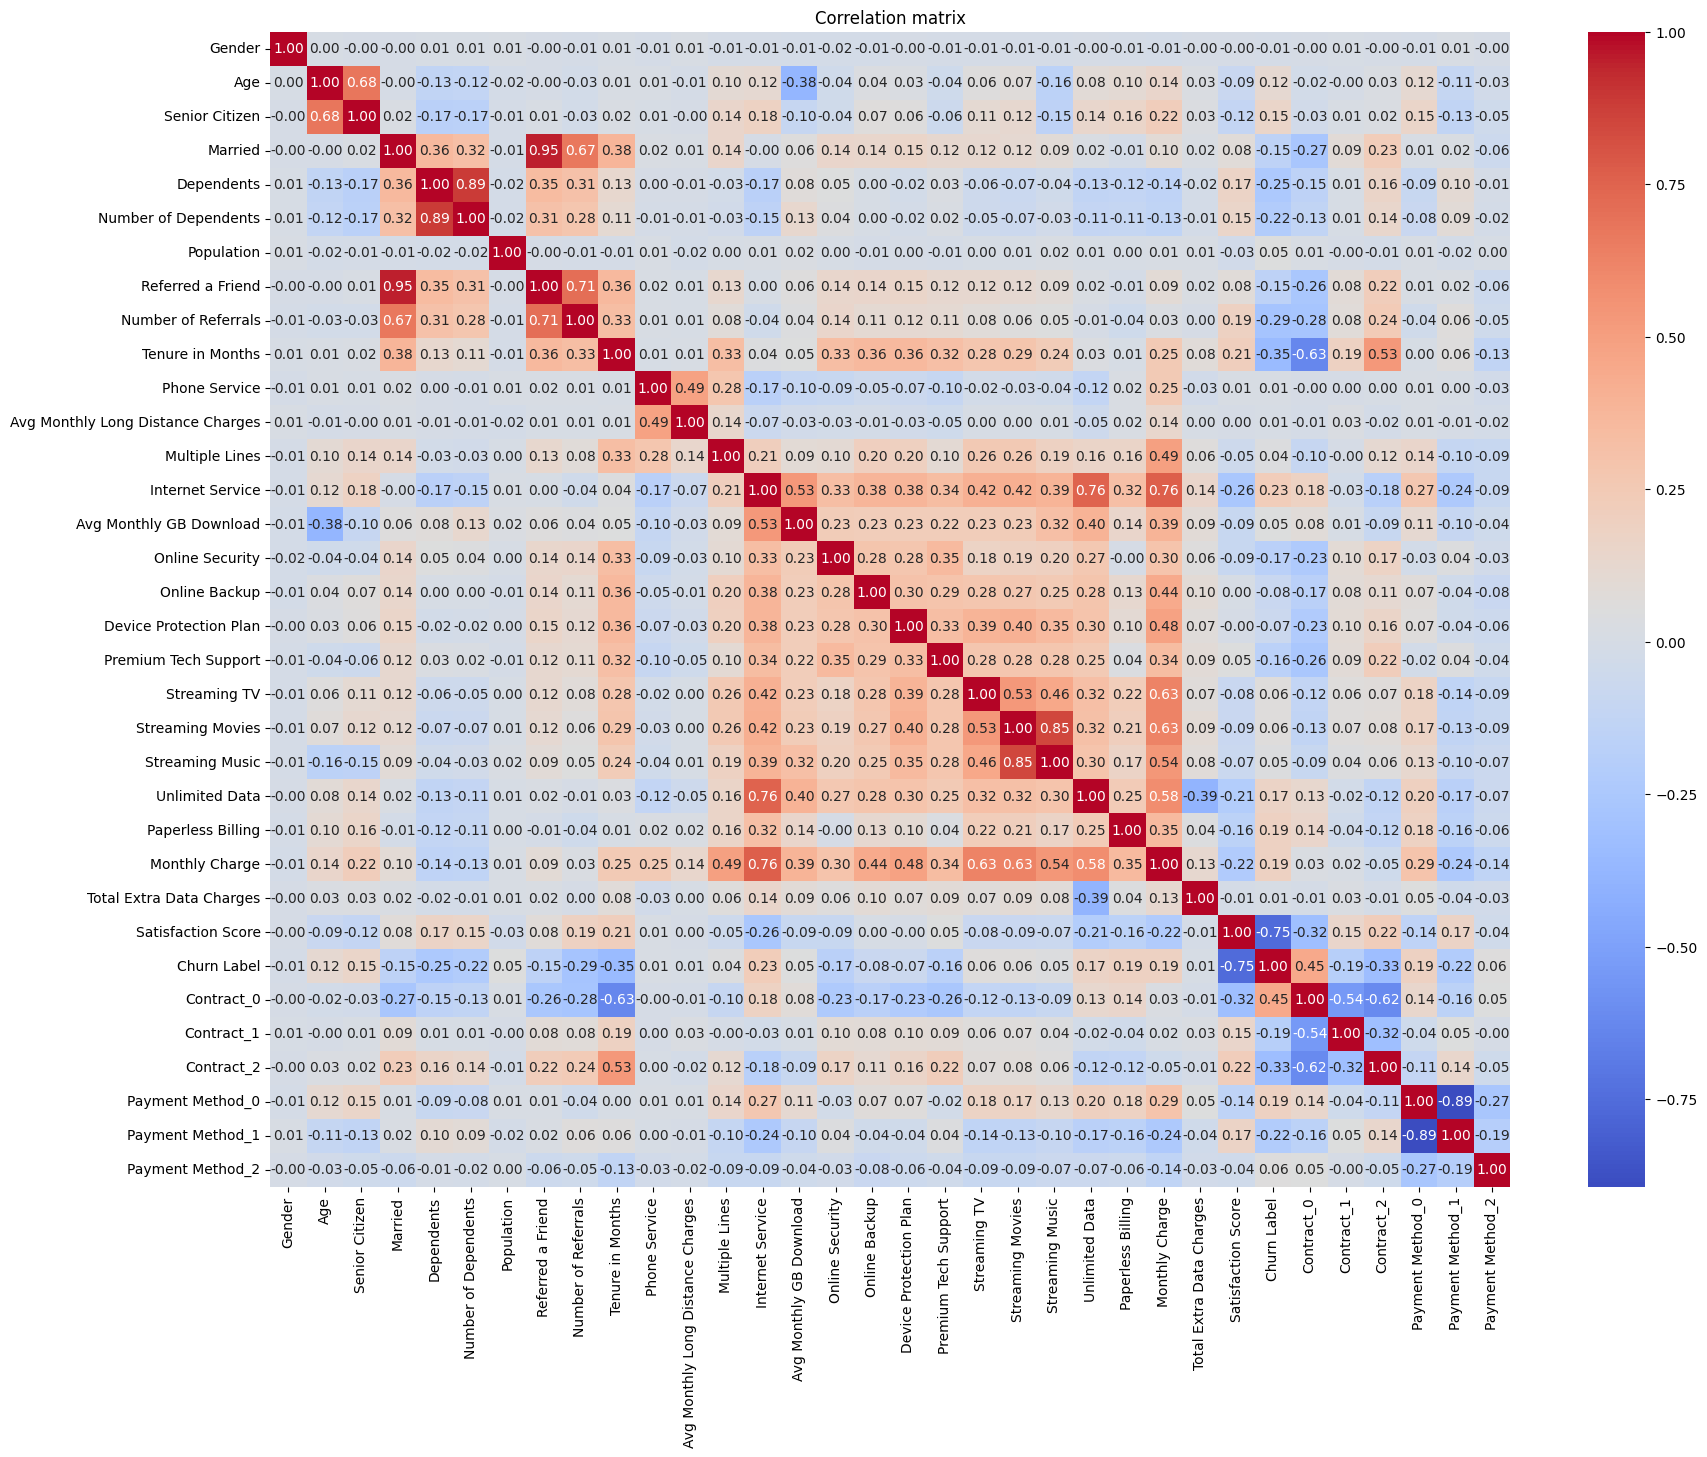

In [51]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [52]:
# Creating sets X and y 
X = df.drop(["Churn Label"], axis=1)
y = df["Churn Label"]

In [53]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.25)

In [54]:
# Calculating the values for y in the original, training and test set
original = y.value_counts(normalize=True)*100
train_dist = y_train.value_counts(normalize=True)*100
test_dist = y_test.value_counts(normalize=True)*100

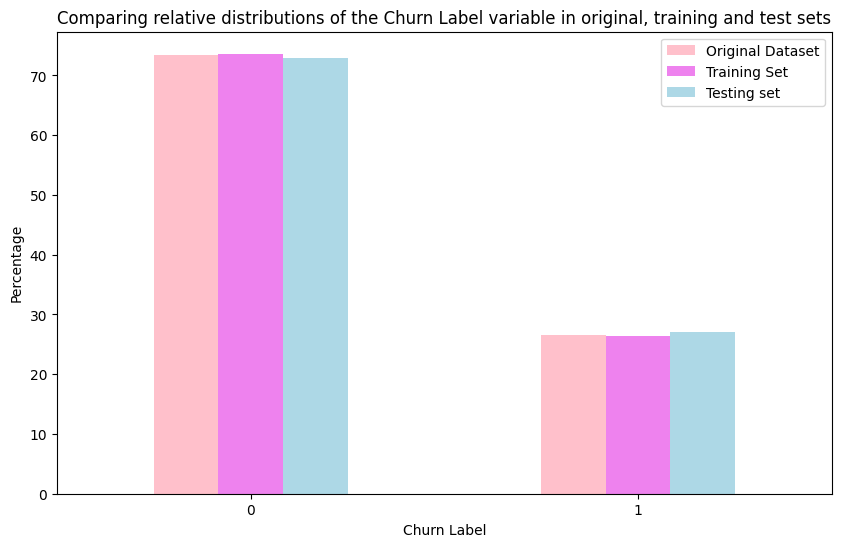

In [55]:
# Creating a dataframe of these values
dist_data = pd.DataFrame({"Original Dataset": original, "Training Set": train_dist, "Testing set": test_dist})

# Making a chart of the relative distributions of Churn Label variable in different sets
colors = ["pink", "violet", "lightblue"]
dist_data.plot(kind="bar", figsize=(10,6), color=colors)
plt.title("Comparing relative distributions of the Churn Label variable in original, training and test sets")
plt.xlabel("Churn Label")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

In [56]:
# Creating logistic regression model
lr_sfs = LogisticRegression(penalty=None, max_iter=15000, multi_class="ovr", random_state=1234)

# Forward feature selection with "F1" as the scoring method
sfs1 = SFS(
    lr_sfs,
    k_features=(1, X_train.shape[1]),
    forward=True,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [57]:
# Fitting the model using training data
sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    3.0s finished
Features: 1/33[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.3s finished
Features: 2/33[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.4s finished
Features: 3/33[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
Features: 4/33[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.7s finished
Features: 5/33[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.8s finished
Features: 6/33[Parallel(n_jobs=-1)]: Using

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=15000,
                                                       multi_class='ovr',
                                                       penalty=None,
                                                       random_state=1234),
                          k_features=(1, 33), n_jobs=-1, scoring='f1',
                          verbose=1)

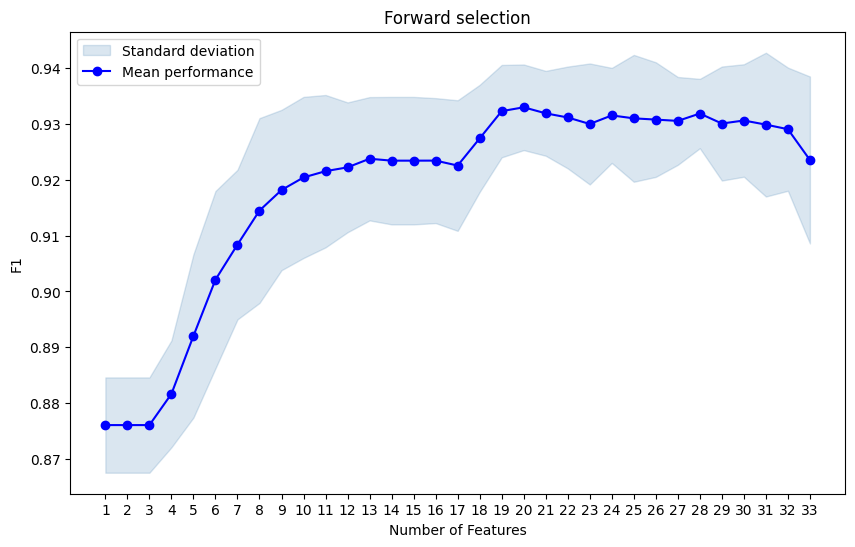

In [58]:
# Visualizing the cross validation scores for each number of features
plot_sfs(sfs1.get_metric_dict(), ylabel="F1", figsize=(10,6))
plt.title("Forward selection")
plt.legend(["Standard deviation", "Mean performance"])

In [59]:
# Names of the selected features
sfs1.k_feature_names_

('Gender',
 'Age',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Referred a Friend',
 'Number of Referrals',
 'Tenure in Months',
 'Internet Service',
 'Online Security',
 'Premium Tech Support',
 'Streaming Movies',
 'Streaming Music',
 'Monthly Charge',
 'Total Extra Data Charges',
 'Satisfaction Score',
 'Contract_0',
 'Contract_1',
 'Contract_2',
 'Payment Method_2')

In [60]:
# Cross-validation score for the best model with forward selection
sfs1.k_score_

0.9329450019325554

In [61]:
# Backward feature selection with "F1" as the scoring method
sfs2 = SFS(
    lr_sfs,
    k_features=(1, X_train.shape[1]),
    forward=False,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fitting the model using training data
sfs2.fit(X_train, y_train)

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

In

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=15000,
                                                       multi_class='ovr',
                                                       penalty=None,
                                                       random_state=1234),
                          forward=False, k_features=(1, 33), n_jobs=-1,
                          scoring='f1', verbose=1)

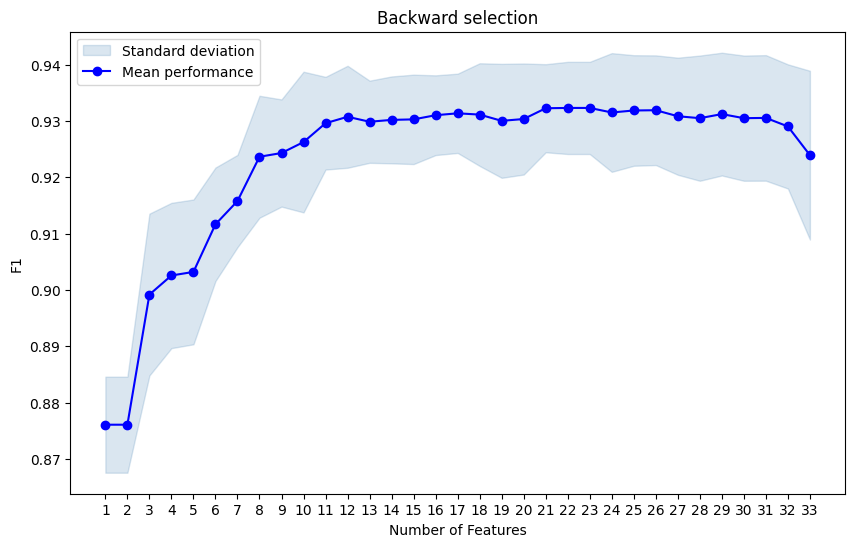

In [63]:
# Visualizing the cross validation scores for each number of features
plot_sfs(sfs2.get_metric_dict(), ylabel="F1", figsize=(10,6))
plt.title("Backward selection")
plt.legend(["Standard deviation", "Mean performance"])

In [71]:
# Names of the selected features
sfs2.k_feature_names_

('Senior Citizen',
 'Married',
 'Dependents',
 'Referred a Friend',
 'Number of Referrals',
 'Tenure in Months',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Streaming Movies',
 'Streaming Music',
 'Paperless Billing',
 'Monthly Charge',
 'Total Extra Data Charges',
 'Satisfaction Score',
 'Contract_0',
 'Contract_2',
 'Payment Method_0',
 'Payment Method_1')

In [64]:
# Cross-validation score for the best model with backward selection
sfs2.k_score_
# BACKWARD SELECTION IS SLIGHTLY BETTER THAN THE FORWARD

0.9323124165439938

In [65]:
# Making versions of train and test sets that only have the selected features (USE BACKWARD SELECTION)
X_train_sfs = sfs2.transform(X_train)
X_test_sfs = sfs2.transform(X_test)

In [66]:
# Fitting the model to the training data
lr_sfs.fit(X_train_sfs, y_train)

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=15000, multi_class='ovr', penalty=None,
                   random_state=1234)

In [67]:
# making predictions for the test data
y_pred_sfs = lr_sfs.predict(X_test_sfs)

# Accuracy score to evaluate model performance
accuracy_score(y_test, y_pred_sfs)

0.9557069846678024

In [68]:
# Precision score
precision_score(y_test, y_pred_sfs)

0.9461883408071748

In [69]:
# Recall score
recall_score(y_test, y_pred_sfs)

0.8865546218487395

In [70]:
# F1 score
f1_score(y_test, y_pred_sfs)

0.9154013015184381

In [71]:
# Viewing the coefficients
coefficients_log_odds = lr_sfs.coef_
coefficients_log_odds

array([[ 1.02313486e+00, -1.73140904e+00, -2.65710102e-01,
         2.23028148e+00, -9.35885508e-01, -2.38034733e-02,
        -1.22095059e+00,  2.72631562e-03, -8.87643619e-01,
         5.73579038e-03, -3.26295847e+00, -1.96833709e-01,
        -7.29576698e-01, -2.55475342e-01, -3.75027474e-01,
         5.95220147e-01,  6.42787557e-01,  3.26200549e-02,
         2.17622569e-03, -5.55795527e+01,  1.79890424e+00,
         8.88595914e-01,  4.42895311e-01]])

In [72]:
# EXP to change the log odds to odds
odds_ratios = np.exp(coefficients_log_odds)
odds_ratios

array([[2.78190200e+00, 1.77034785e-01, 7.66661349e-01, 9.30248422e+00,
        3.92238382e-01, 9.76477595e-01, 2.94949659e-01, 1.00273004e+00,
        4.11624555e-01, 1.00575227e+00, 3.82749950e-02, 8.21327202e-01,
        4.82113026e-01, 7.74548235e-01, 6.87270396e-01, 1.81343012e+00,
        1.90177480e+00, 1.03315792e+00, 1.00217860e+00, 7.27959053e-25,
        6.04302215e+00, 2.43171292e+00, 1.55720930e+00]])

In [73]:
# Intercept
lr_sfs.intercept_

array([30.55217755])

Text(0.5, 1.0, 'Logistic regression (normalized)')

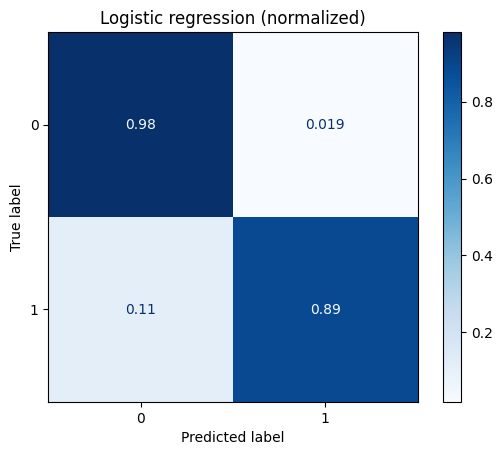

In [74]:
# Confusion matrix (normalized)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sfs, cmap="Blues", normalize="true")
plt.title("Logistic regression (normalized)")

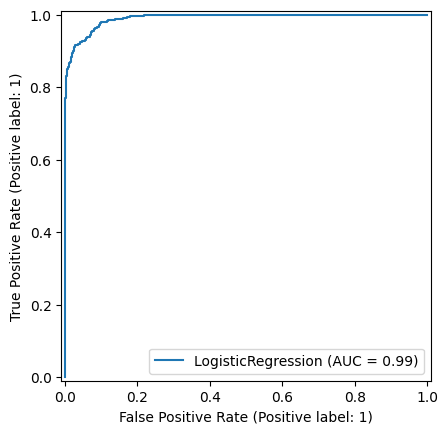

In [75]:
# ROC curve and AUC
RocCurveDisplay.from_estimator(lr_sfs, X_test_sfs, y_test)

In [76]:

feature_importance_df = pd.DataFrame({
    "Feature": sfs2.k_feature_names_,   # Use your feature names from the dataset
    "Odds ratio": 1/odds_ratios.flatten()
})

# Sorting the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by="Odds ratio", ascending=False)

# Printing the DataFrame to view feature importances
print("\nFeature Importance Table (Odds Ratios):\n")
print(feature_importance_df.to_string(index=False, formatters={'Odds ratio': '{:.2f}'.format}))
#print(feature_importance_df.to_string(index=False, formatters={'Odds ratio': '{:.2f}'.format}))


Feature Importance Table (Odds Ratios):

                          Feature                   Odds ratio
               Satisfaction Score 1373703638034700342132736.00
                  Online Security                        26.13
                       Dependents                         5.65
                    Phone Service                         3.39
              Number of Referrals                         2.55
                 Internet Service                         2.43
             Premium Tech Support                         2.07
                 Streaming Movies                         1.46
             Number of Dependents                         1.30
                     Streaming TV                         1.29
           Device Protection Plan                         1.22
                 Tenure in Months                         1.02
         Total Extra Data Charges                         1.00
Avg Monthly Long Distance Charges                         1.00
          Avg